
Final Project Report

    Class: DS 5100
    Student Name: Stephen Kullman
    Student Net ID: sjk5cu
    This URL: https://github.com/sjk5cu/sjk5cu_ds5100_montecarlo/blob/main/montecarlo_demo.ipynb



Instructions

Follow the instructions in the Final Project isntructions and put your work in this notebook.

Total points for each subsection under Deliverables and Scenarios are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth 50 points.


# Deliverables

## The Monte Carlo Module (10)

Put the URL to your GitHub repo here.

Repo URL: https://github.com/sjk5cu/sjk5cu_ds5100_montecarlo

Paste a copy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import numpy as np
import pandas as pd
import random


class Die():
    '''
    This is a class to model a generalized n-sided 'die'. It can be a two sided coin, a 6 sided die, a deck of cards, etc.

    Attributes
    -----------
    sides: a numpy array of the sides of the generalised die. 

    Methods
    ------------
    roll_dice(): Intiializes a Die object. Takes a NumPy Array as a parameter. Default weights are 1 for every face
    change_weights(): A function to change one weight of the generalized die. Takes two arguments: the side to be changed, and the new weight
    show_die(): Function to return the copy of the die dataframe showing sides and weights
    
    '''
    
    def __init__(self,sides):
        ''' Intiializes a Die object. Takes a NumPy Array as a parameter. Default weights are 1 for every face'''

        if type(sides) == type(np.array([0])):
            if len(sides) == len(np.unique(sides)):
                self.sides=len(sides)
                self._weight= pd.DataFrame({"side": [i for i in sides],
                                            "weights": [1 for i in sides],
                                            })
                
                self._die = self._weight.set_index('side')
                                    
            else: raise ValueError("Values must be distinct")
        else: raise TypeError("Input must be a Numpy Array")

    def roll_dice(self,n_rolls=1):
        '''a function to roll the generalized die. Takes an argument n_rolls and returns a list of the output'''

        for i in range(n_rolls):
            result = random.choices(self._die.index,k=n_rolls,weights = self._die.weights)
            
        return result
    
    def change_weights(self,side,new_weight:int):
        '''A function to change one weight of the generalized die. Takes two arguments: the side to be changed, and the new weight'''

        if side in self._die.index:
            self._die.loc[side] = new_weight
        else: raise IndexError("Side Not Found")
        

    def show_die(self):
        '''Function to return the copy of the die dataframe showing sides and weights'''
        
        return self._die.copy(deep=True)
    
    



class Game():
    ''' 
    Class to simulate a monte carlo game. Takes in a list of generalized Die objects 

    Attributes
    -------------
    dice: list of die objects. Must be list data type


    Methods
    ------------
    play(): method to play a game for a given number of trials
    show_results(): method to show results of the game
    '''
    
    def __init__(self,list_of_dice:list):
        ''' 
        Initializes a Game object. Takes a list of Die objects as a parameter
        
        Inputs
        -----------
        list_of_dice = list of Die objects. Must be list. No default value
    
        '''
        
        if type(list_of_dice) == type([]):
            self.dice = list_of_dice
            self._results = []
        else: raise TypeError("Value must be a list")

    def play(self,trials:int):
        '''
        Method to play a game for a given number of trials

        Inputs
        -------
        trials: integer of how many rolls each die will be rolled.

        Stores results in object attribute and returns a copy
        '''

        gameResults = {f'Die{i+1}': die.roll_dice(trials) for i,die in enumerate(self.dice)}
        self._results = pd.DataFrame(gameResults)   
        return self._results.copy(deep=True)

    def show_results(self, format="wide"):
        '''
        Method to show results of the game. Returns a dataframe of the results
        
        Input
        -------
        format: str value. Can be wide or narrow. 

        Returns a dataframe of the game results
        '''
        
        if type(format) == str:
            if format.lower() == "wide":
                return self._results.copy()
            elif format.lower() == "narrow":
                return self._results.copy().melt(ignore_index=False).rename_axis("Roll",axis=0).rename({"variable":"Die","value":"Value"},axis=1).reset_index().set_index(["Roll","Die"])
            else: raise ValueError("Please select Wide or Narrow for format")
        else: raise TypeError("Value must be a string")

class Analyzer():
    ''' 
    Initializes an Analyzer object

    Attributes
    --------------
    game: the game object passed into the init
    data: the results of the game object to be analyzed

    Methods
    --------------
    jackpot(): returns the number of jackpots, where jackpot is defined as the same face for all die cast in the same roll. All 1's, for example.
    face_counts(): returns a dataframe of each face count present per roll
    combo_count(): Computes the combinations of each roll and stores it in a dataframe
    permu_count(): Computes the permutations of each roll and stores it in a dataframe
    
    '''
    def __init__(self,gameObject):
        ''' 
        Initializes an Analyzer object. Takes a single Game object as a parameter
        
        Input: a Game object. Must be a game object.
        '''

        if not isinstance(gameObject,Game):
            raise TypeError("Must take a Game Object")
        
        self.game = gameObject
        self.data = self.game.show_results()

    def jackpot(self):
        '''
        Returns the number of jackpots in a given game. Jackpot is defined as all 1's on a roll, for example.

        '''

        data = self.game.show_results()
        jackpot_counter = 0
        
        for index in data.index:
            if len(data.iloc[index].value_counts()) == 1:
                jackpot_counter += 1
        return jackpot_counter

    def face_counts(self):
        '''Computes how many times a given face is rolled in each event. Returns a dataframe of results'''
        
        lists = [self.data.iloc[row].value_counts().reset_index() for row in self.data.index]
        final = pd.concat(lists,axis=0).groupby("index").sum().T
    
        return final

    def combo_count(self):
        '''Computes distinct combinations of faces rolled along with their counts. Returns a dataframe of results'''
        
        sort = np.sort(self.data.values,axis=1)
        df =  pd.DataFrame(sort,columns = self.data.columns).value_counts()
        return df

    def permu_count(self):
        '''Computes distinct permutations of faces rolled along with their counts. Returns a dataframe of results'''

        return self.data.value_counts().to_frame()
```



## Unit Test Module (2)

```python
import unittest
from montecarlo import Die,Game,Analyzer
import numpy as np
import pandas as pd

class monteCarloTestSuite(unittest.TestCase):
    
    def test_1_roll_dice(self):

        a = np.array([1,2,3,4,5,6])
        test = []
        die1 = Die(a)
        ans = die1.roll_dice()
        self.assertTrue(type(ans)==type(test))


    def test_2_change_weights(self):
         
         a = np.array([1,2,3,4,5,6])
         die1 = Die(a)
         die1.change_weights(2,2)
         test = 2
         ans = die1.show_die().iloc[1].item()
         self.assertTrue(ans,test)

    def test_3_show_die(self):

        a = np.array([1,2,3,4,5,6])
        die1 = Die(a)
        test = die1.show_die()
        ans = pd.DataFrame()
        self.assertTrue(type(ans) == type(test))
       

    def test_4_play(self):

        a = np.array([1,2,3,4,5,6])
        die1 = Die(a)
        die2 = Die(a)
        list = [die1,die2]
        game = Game(list)
        game.play(5)
        answer = 5
        test = len(game.show_results())
        self.assertEqual(answer,test)

    def test_5_show_results(self):
        
        a = np.array([1,2,3,4,5,6])
        die1 = Die(a)
        die2 = Die(a)
        list = [die1,die2]
        game = Game(list)
        game.play(5)
        ans = pd.DataFrame()
        test = game.show_results()
        self.assertTrue(type(test)==type(ans))
              
    def test_6_jackpot(self): 
       
       a = np.array([1,2,3,4,5,6])
       die1 = Die(a)
       die2 = Die(a)
       list = [die1,die2]
       game = Game(list)
       game.play(5)
       analyzer = Analyzer(game)
       a = 8
       b = analyzer.jackpot()
       self.assertTrue(type(a)==type(b)) 

    def test_7_combo_count(self): 
       
       a = np.array([1,2,3,4,5,6])
       die1 = Die(a)
       die2 = Die(a)
       list = [die1,die2]
       game = Game(list)
       game.play(5)
       analyzer = Analyzer(game)
       ans = pd.DataFrame()
       test = analyzer.combo_count()
       self.assertTrue(type(test)==type(ans))

    def test_8_permu_count(self): 

        a = np.array([1,2,3,4,5,6])
        die1 = Die(a)
        die2 = Die(a)
        list = [die1,die2]
        game = Game(list)
        game.play(5)
        analyzer = Analyzer(game)
        ans = pd.DataFrame()
        test = analyzer.permu_count()
        self.assertTrue(type(test)==type(ans))

    def test_9_face_counts(self):

        a = np.array([1,2,3,4,5,6])
        die1 = Die(a)
        die2 = Die(a)
        list = [die1,die2]
        game = Game(list)
        game.play(5)
        analyzer = Analyzer(game)
        ans = pd.DataFrame()
        test = analyzer.face_counts()
        self.assertTrue(type(test)==type(ans))

    def test_10_die_object(self):

        a = np.array([1,2,3,4,5,6])
        die1 = Die(a)
        self.assertTrue(type(die1)==Die)

    def test_11_game_object(self):

        a = np.array([1,2,3,4,5,6])
        die1 = Die(a)
        die2 = Die(a)
        list = [die1,die2]
        game = Game(list)
        self.assertTrue(type(game)==Game)

    def test_12_analyzer_object(self):

        a = np.array([1,2,3,4,5,6])
        die1 = Die(a)
        die2 = Die(a)
        list = [die1,die2]
        game = Game(list)
        game.play(5)
        analyzer = Analyzer(game)
        self.assertTrue(type(analyzer)==Analyzer)

                
if __name__ == '__main__':
    
    unittest.main(verbosity=3)

```

## Unit Test Results (3)

```text
test_10_die_object (__main__.monteCarloTestSuite) ... ok
test_11_game_object (__main__.monteCarloTestSuite) ... ok
test_12_analyzer_object (__main__.monteCarloTestSuite) ... ok
test_1_roll_dice (__main__.monteCarloTestSuite) ... ok
test_2_change_weights (__main__.monteCarloTestSuite) ... ok
test_3_show_die (__main__.monteCarloTestSuite) ... ok
test_4_play (__main__.monteCarloTestSuite) ... ok
test_5_show_results (__main__.monteCarloTestSuite) ... ok
test_6_jackpot (__main__.monteCarloTestSuite) ... ok
test_7_combo_count (__main__.monteCarloTestSuite) ... ok
test_8_permu_count (__main__.monteCarloTestSuite) ... ok
test_9_face_counts (__main__.monteCarloTestSuite) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.010s

OK
```

## Import (1)

In [44]:
import numpy as np
import pandas as pd
from montecarlo import Die,Game,Analyzer

## Help Docs (4)

In [84]:
help(Die)

Help on class Die in module montecarlo:

class Die(builtins.object)
 |  Die(sides)
 |  
 |  This is a class to model a generalized n-sided 'die'. It can be a two sided coin, a 6 sided die, a deck of cards, etc.
 |  
 |  Attributes
 |  -----------
 |  sides: a numpy array of the sides of the generalised die. 
 |  
 |  Methods
 |  ------------
 |  roll_dice(): Intiializes a Die object. Takes a NumPy Array as a parameter. Default weights are 1 for every face
 |  change_weights(): A function to change one weight of the generalized die. Takes two arguments: the side to be changed, and the new weight
 |  show_die(): Function to return the copy of the die dataframe showing sides and weights
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sides)
 |      Intiializes a Die object. Takes a NumPy Array as a parameter. Default weights are 1 for every face
 |  
 |  change_weights(self, side, new_weight: int)
 |      A function to change one weight of the generalized die. Takes two arguments: 

In [85]:
help(Game)

Help on class Game in module montecarlo:

class Game(builtins.object)
 |  Game(list_of_dice: list)
 |  
 |  Class to simulate a monte carlo game. Takes in a list of generalized Die objects 
 |  
 |  Attributes
 |  -------------
 |  dice: list of die objects. Must be list data type
 |  
 |  
 |  Methods
 |  ------------
 |  play(): method to play a game for a given number of trials
 |  show_results(): method to show results of the game
 |  
 |  Methods defined here:
 |  
 |  __init__(self, list_of_dice: list)
 |      Initializes a Game object. Takes a list of Die objects as a parameter
 |      
 |      Inputs
 |      -----------
 |      list_of_dice = list of Die objects. Must be list. No default value
 |  
 |  play(self, trials: int)
 |      Method to play a game for a given number of trials
 |      
 |      Inputs
 |      -------
 |      trials: integer of how many rolls each die will be rolled.
 |      
 |      Stores results in object attribute and returns a copy
 |  
 |  show_resul

In [86]:
help(Analyzer)

Help on class Analyzer in module montecarlo:

class Analyzer(builtins.object)
 |  Analyzer(gameObject)
 |  
 |  Initializes an Analyzer object
 |  
 |  Attributes
 |  --------------
 |  game: the game object passed into the init
 |  data: the results of the game object to be analyzed
 |  
 |  Methods
 |  --------------
 |  jackpot(): returns the number of jackpots, where jackpot is defined as the same face for all die cast in the same roll. All 1's, for example.
 |  face_counts(): returns a dataframe of each face count present per roll
 |  combo_count(): Computes the combinations of each roll and stores it in a dataframe
 |  permu_count(): Computes the permutations of each roll and stores it in a dataframe
 |  
 |  Methods defined here:
 |  
 |  __init__(self, gameObject)
 |      Initializes an Analyzer object. Takes a single Game object as a parameter
 |      
 |      Input: a Game object. Must be a game object.
 |  
 |  combo_count(self)
 |      Computes distinct combinations of face

## README.md File (3)

https://github.com/sjk5cu/sjk5cu_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

(base) stephenkullman@MacBook-Air sjk5cu_ds5100_montecarlo % pip install montecarlo \
Collecting montecarlo \
  Downloading montecarlo-0.1.17.tar.gz (1.3 kB) \
  Preparing metadata (setup.py) ... done \
Building wheels for collected packages: montecarlo \
  Building wheel for montecarlo (setup.py) ... done \
  Created wheel for montecarlo: filename=montecarlo-0.1.17-py3-none-any.whl size=1857 \ sha256=1695eeda42ffca14236191f15150ad9650ecc27d1c647ea4e4db7b58056f62a4 \
  Stored in directory: /Users/stephenkullman/Library/Caches/pip/wheels/9b/96/96/9ba8cf535febd42d4b6f0650941b412502cd6f6471bca1bf12 \
Successfully built montecarlo \
Installing collected packages: montecarlo \
Successfully installed montecarlo-0.1.17 \

# Scenarios

## Scenario 1: A 2-headed Coin

Create a fair coin (with faces H and T) and one unfair coin in which one of the faces has a weight of 5 and the others 1

In [45]:
a = np.array(["H","T"])
coin1 = Die(a)
unfairCoin = Die(a)

In [46]:
unfairCoin.change_weights(side="H",new_weight=5)

Play a game of 1000 flips with two fair dice.

In [47]:
gameFair = Game([coin1,coin1])

In [48]:
gameFair.play(1000)

,Die1,Die2
0,H,H
1,T,H
2,H,H
3,T,T
4,T,H
...,...,...
995,H,H
996,H,H
997,H,H
998,T,H


Play another game (using a new Game object) of 1000 flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

In [49]:
gameUnfair = Game([unfairCoin,unfairCoin,coin1])

In [50]:
gameUnfair.play(1000)

,Die1,Die2,Die3
0,H,H,T
1,H,H,T
2,H,T,T
3,H,H,H
4,H,H,T
...,...,...,...
995,H,T,T
996,H,H,T
997,H,H,H
998,H,H,H


For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all Hs or all Ts.

In [51]:
fairAnalyzer = Analyzer(gameFair)

In [52]:
fairAnalyzer.jackpot()

519

In [53]:
unfairAnalyzer = Analyzer(gameUnfair)

In [54]:
unfairAnalyzer.jackpot()

349

For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

In [55]:
freqFair = fairAnalyzer.jackpot() / len(gameFair.show_results())
freqFair

0.519

In [56]:
freqUnfair = unfairAnalyzer.jackpot() / len(gameUnfair.show_results())
freqUnfair

0.349

Show your results, comparing the two relative frequencies, in a simple bar chart.

In [57]:
dictionary = {"Fair":[freqFair],
              "Unfair": [freqUnfair]}

In [58]:
bar_graph = pd.DataFrame(dictionary)

<Axes: >

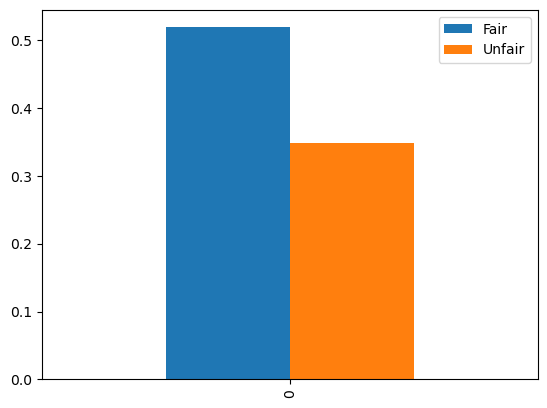

In [59]:
bar_graph.plot.bar()

## Scenario 2: A 6-sided Die

Create three dice, each with six sides having the faces 1 through 6.

In [60]:
a = np.array([1,2,3,4,5,6])
die1 = Die(a)
die2 = Die(a)
die3 = Die(a)

Convert one die to an unfair one by weighting the face 6 five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

In [61]:
die2.change_weights(6,5)

Convert another die to be unfair by weighting the face five times more than the others.

In [62]:
die3.change_weights(1,5)

Play a game of 10000 rolls with 5 fair dice.

In [63]:
dieGame = Game([die1,die1,die1,die1,die1])
dieGame.play(10000)

,Die1,Die2,Die3,Die4,Die5
0,3,2,2,5,4
1,6,2,6,2,4
2,6,1,3,1,5
3,3,2,5,1,1
4,3,5,6,2,4
...,...,...,...,...,...
9995,5,1,6,5,3
9996,6,4,1,3,1
9997,5,1,6,1,3
9998,2,2,3,6,6


Play a game of 10000 rolls with unfair dice, one as defined in steps #2 and #3 respectively, and fair dice.

In [64]:
dieGame2 = Game([die2,die3,die1,die1,die1])

In [65]:
dieGame2.play(10000)

,Die1,Die2,Die3,Die4,Die5
0,6,1,2,5,5
1,2,6,5,6,6
2,5,1,3,1,3
3,1,1,6,6,2
4,2,1,3,1,2
...,...,...,...,...,...
9995,2,1,6,6,5
9996,6,2,1,1,4
9997,5,1,3,4,2
9998,6,1,2,6,1


For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

In [66]:
analyzer1 = Analyzer(dieGame)
analyzer2 = Analyzer(dieGame2)

In [67]:
jackpot1 = analyzer1.jackpot()
jackpot1

10

In [68]:
jackpot2 = analyzer2.jackpot()
jackpot2

6

In [69]:
jackpot_graph = {"Die Game 1" :[jackpot1],
                 "Die Game 2" : [jackpot2]}

graph = pd.DataFrame(jackpot_graph)

<Axes: >

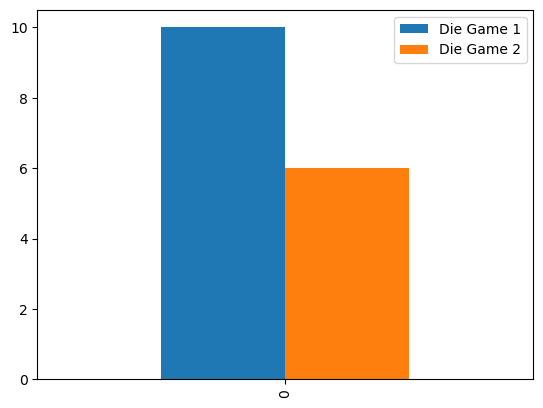

In [70]:
graph.plot.bar()

## Scenario 3: Letters of the Alphabet

Create a “die” of letters from to with weights based on their frequency of usage as found in the data file english_letters.txt. Use the frequencies (i.e. raw counts) as weights.

In [71]:
letters = pd.read_csv("/Users/stephenkullman/Desktop/Python/sjk5cu_ds5100_montecarlo/english_letters.txt",sep=" ", header=None)

In [72]:
faces = letters[0].to_list()
weights = letters[1].to_list()


In [73]:
die = Die(np.array(faces))

for i,face in enumerate(faces):
    die.change_weights(face,weights[i])
    

In [74]:
die.show_die()

,weights
side,
E,529117365
T,390965105
A,374061888
O,326627740
I,320410057
N,313720540
S,294300210
R,277000841
H,216768975


Play a game involving 4 of these dice with 1000 rolls.

In [75]:
yahtzee = Game([die,die,die,die])
yahtzee.play(1000)

,Die1,Die2,Die3,Die4
0,T,A,I,U
1,D,R,E,N
2,R,O,Y,A
3,C,L,H,D
4,R,T,Y,C
...,...,...,...,...
995,S,O,H,A
996,S,Y,T,S
997,R,N,O,H
998,M,E,N,T


Determine wow many distinct permutations in your results are actual English words, based on the vocabulary found in scrabble_words.txt.



In [76]:
yahtzeeAnalyzer = Analyzer(yahtzee)
words = yahtzeeAnalyzer.permu_count()
list = []
for index in (words.index):
    list.append("".join(index))

In [77]:
wordList = pd.read_csv("/Users/stephenkullman/Desktop/Python/sjk5cu_ds5100_montecarlo/scrabble_words.txt",header=None)
wordList = wordList.values.tolist()
wordFinal = []
for i in range(len(wordList)):
    wordFinal.append(wordList[i][0])

In [78]:
len(set(list) & set(wordFinal))

46

Repeat steps #2 and #3 using 5 dice and compare the results. Which word length generates a higher percentage of English words?

In [79]:
yahtzee2 = Game([die,die,die,die])
yahtzee2.play(1000)

,Die1,Die2,Die3,Die4
0,T,W,I,A
1,H,F,U,N
2,E,S,O,M
3,I,A,N,C
4,O,E,F,D
...,...,...,...,...
995,A,E,I,H
996,E,M,V,C
997,E,M,N,D
998,E,A,P,M


In [80]:
words2 = yahtzee2.play(1000)

In [81]:
list2 = []
for index in (words.index):
    list2.append("".join(index))

In [82]:
yahtzeeAnalyzer2 = Analyzer(yahtzee2)
words2 = yahtzeeAnalyzer2.permu_count()
list2 = []
for index in (words2.index):
    list2.append("".join(index))

In [83]:
len(set(list2) & set(wordFinal))

49